___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

#  Ingest the data to notebook 

In [2]:
df = pd.read_csv("heart.csv")

# EDA

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.target.unique()

array([1, 0], dtype=int64)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

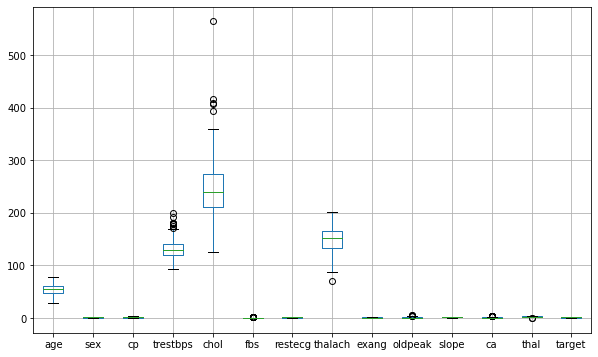

In [9]:
df.boxplot()

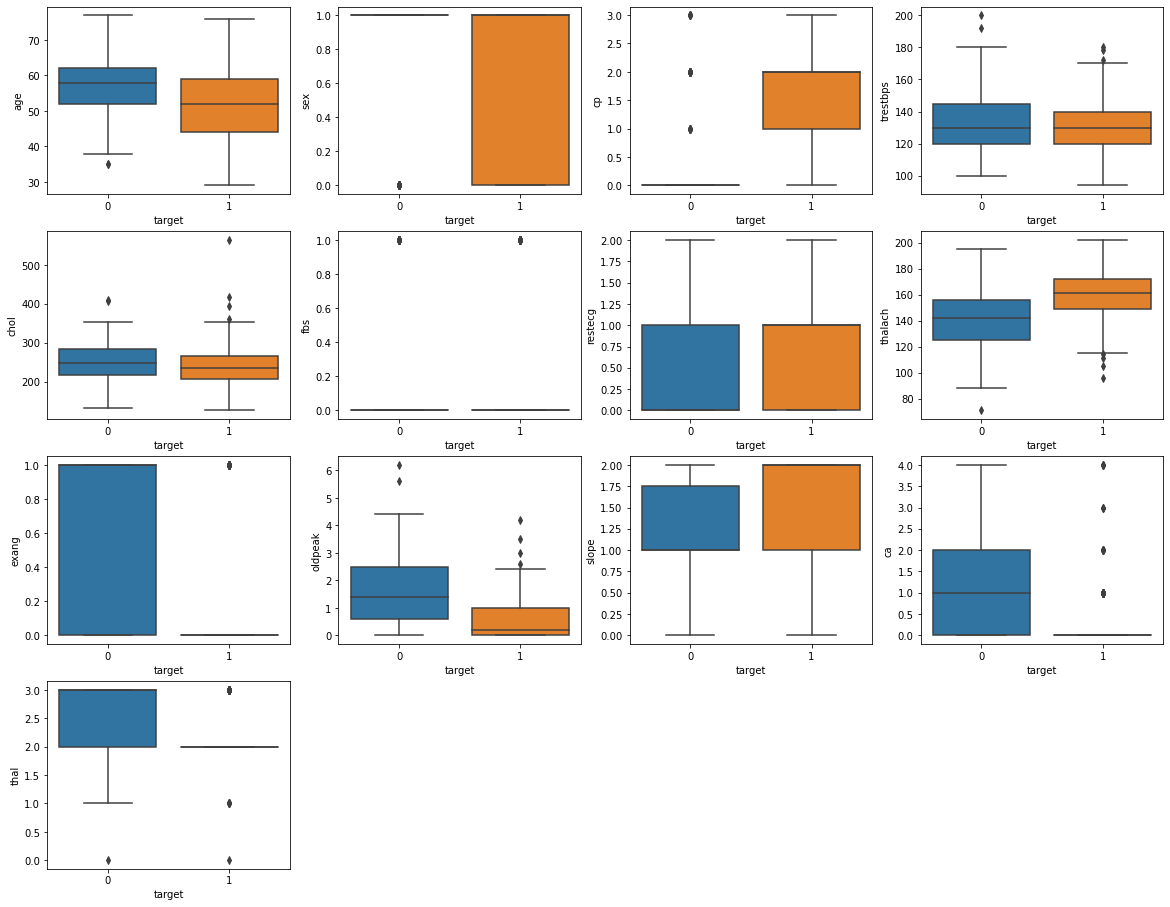

In [10]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(5,4,index)
        sns.boxplot(x='target',y=feature, data=df)

<AxesSubplot:>

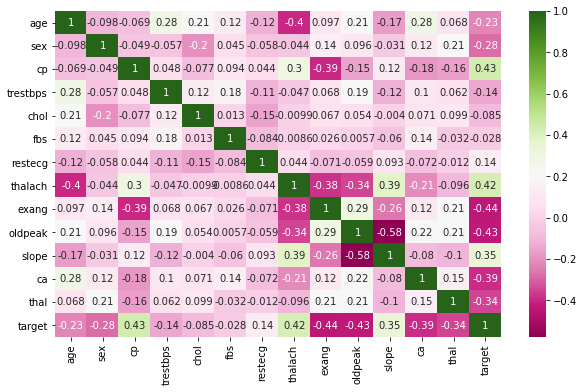

In [11]:
sns.heatmap(df.corr(), annot = True,cmap="PiYG")

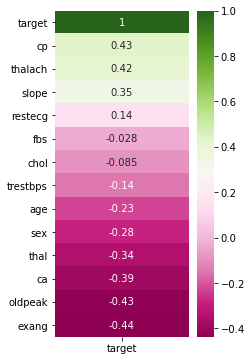

In [12]:
plt.figure(figsize=(3,6))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), 
            vmax = 1,
            annot=True, 
            cmap="PiYG")
plt.show()

<AxesSubplot:>

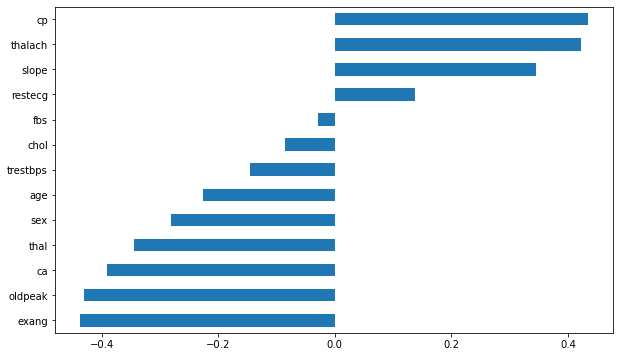

In [13]:
df.corr()["target"].drop("target").sort_values().plot.barh()

In [14]:
#sns.pairplot(df,hue='target',corner=True);

In [15]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

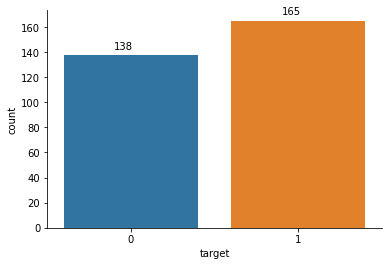

In [16]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [17]:
df.duplicated().sum()

1

In [18]:
df = df.drop_duplicates()

# Data Preprocessing

In [19]:
X = df.drop('target',axis=1)
y = df['target']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model = LogisticRegression()

In [26]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
log_model.coef_

array([[-0.06843536, -0.72568886,  0.86032479, -0.30631257, -0.13173309,
         0.04646936,  0.23462867,  0.35577216, -0.40599663, -0.63117356,
         0.28318166, -0.70013381, -0.56979395]])

In [28]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [29]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.05809744, 0.94190256],
       [0.24199193, 0.75800807],
       [0.24734205, 0.75265795],
       [0.02202845, 0.97797155],
       [0.98352213, 0.01647787],
       [0.14438326, 0.85561674],
       [0.08219318, 0.91780682],
       [0.9855165 , 0.0144835 ],
       [0.85251506, 0.14748494],
       [0.25552797, 0.74447203],
       [0.72826734, 0.27173266],
       [0.34029243, 0.65970757],
       [0.37541504, 0.62458496],
       [0.62866545, 0.37133455],
       [0.08419418, 0.91580582],
       [0.21383075, 0.78616925],
       [0.01190077, 0.98809923],
       [0.19957878, 0.80042122],
       [0.21080563, 0.78919437],
       [0.98908298, 0.01091702],
       [0.97297158, 0.02702842],
       [0.9495466 , 0.0504534 ],
       [0.32464833, 0.67535167],
       [0.79300226, 0.20699774],
       [0.92310139, 0.07689861],
       [0.03745048, 0.96254952],
       [0.98239166, 0.01760834],
       [0.27025925, 0.72974075],
       [0.97891259, 0.02108741],
       [0.07020376, 0.92979624],
       [0.

In [30]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [31]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1,0.941903
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0.758008
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,0.752658
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1,0.977972
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.016478
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1,0.855617
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,0.917807
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0,0.014483
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0,0.147485
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1,0.744472


In [32]:
test_data["pred"] = y_pred
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1,0.941903,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0.758008,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,0.752658,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1,0.977972,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.016478,0
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1,0.855617,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,0.917807,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0,0.014483,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0,0.147485,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1,0.744472,1


In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve,plot_confusion_matrix

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("----------------------------------------------------------")
    print("                  Test_Set")
    print("----------------------------------------------------------")
    print(confusion_matrix(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------")
    print("                 Train_Set")
    print("----------------------------------------------------------")
    print(confusion_matrix(y_train, y_train_pred))
    
    print(classification_report(y_train, y_train_pred))

In [35]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

----------------------------------------------------------
                  Test_Set
----------------------------------------------------------
[[12  2]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31

----------------------------------------------------------
                 Train_Set
----------------------------------------------------------
[[ 96  28]
 [ 13 134]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       124
           1       0.83      0.91      0.87       147

    accuracy                           0.85       271
   macro avg       0.85      0.84      0.85       271
weighted avg       0.85      0.85      0.85       271



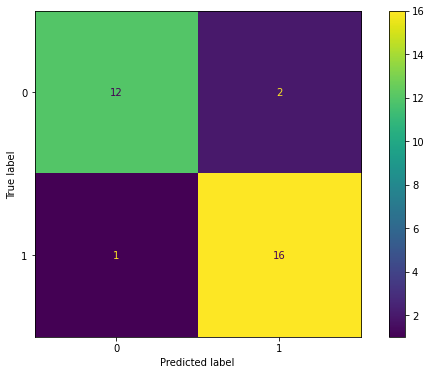

In [36]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

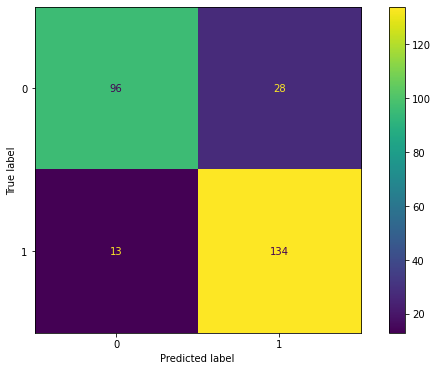

In [37]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

## grid

In [38]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20) # aradaki değerleri linear olarak dağıtıyor.
C = np.logspace(0, 10, 20)  # aradaki değerleri logaritmik olarak dağıtıyor.

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}
# best parametreler neler bakalım.

In [39]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

<IPython.core.display.Javascript object>

In [40]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [41]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [42]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [43]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  2]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



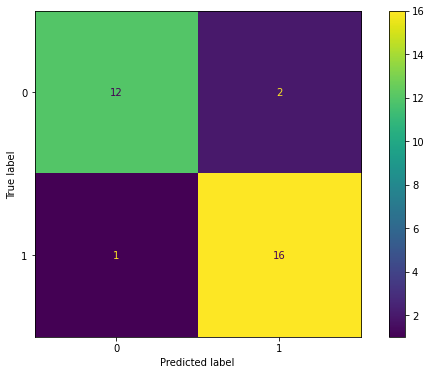

In [44]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
error = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=10)
    error.append(mean_squared_error(y,y_pred)) 

In [47]:
import matplotlib.pyplot as plt

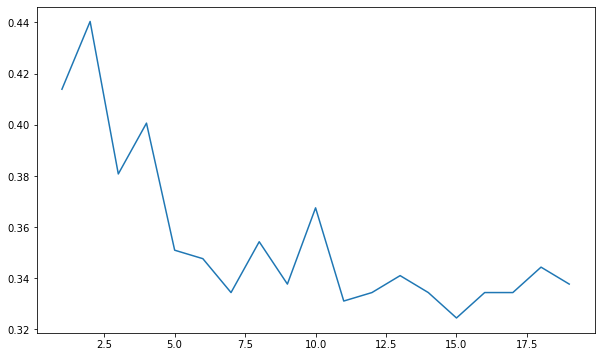

In [48]:
plt.plot(range(1,20),error)

In [49]:
import math
math.sqrt(len(y_test))

5.5677643628300215

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [51]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [52]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

----------------------------------------------------------
                  Test_Set
----------------------------------------------------------
[[13  1]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.93      0.82      0.87        17

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31

----------------------------------------------------------
                 Train_Set
----------------------------------------------------------
[[106  18]
 [ 16 131]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       124
           1       0.88      0.89      0.89       147

    accuracy                           0.87       271
   macro avg       0.87      0.87      0.87       271
weighted avg       0.87      0.87      0.87       271



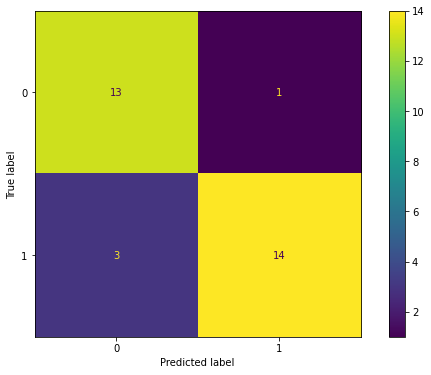

In [53]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

## knn grid

In [54]:
knn_grid = KNeighborsClassifier()

In [55]:
param_grid = {"n_neighbors":range(1,30), "p": [1,2], "weights": ['uniform', "distance"]}

In [56]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

<IPython.core.display.Javascript object>

In [57]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [58]:
knn_grid_model.best_params_

{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

In [59]:
y_pred = knn_grid_model.predict(X_test_scaled)

In [60]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  1]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.94      0.88      0.91        17

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



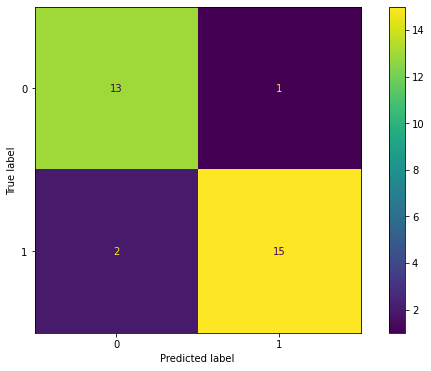

In [61]:
plot_confusion_matrix(knn_grid_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

In [62]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve,plot_confusion_matrix

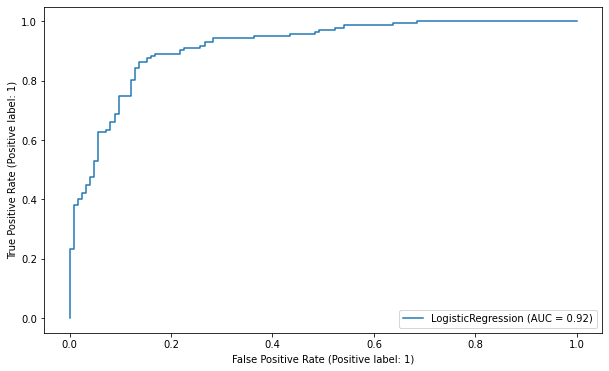

In [63]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [64]:
y_pred_proba = log_model.predict_proba(X_train_scaled) 
roc_auc_score(y_train, y_pred_proba[:,1])

0.9159534781654598

In [65]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [66]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5887610583665835

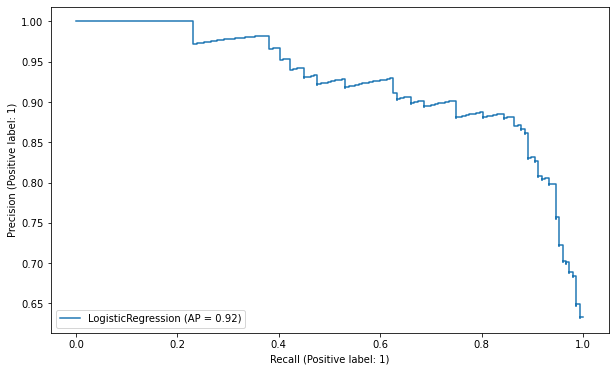

In [67]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [68]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9242455677186555

In [69]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [70]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5517443492868648

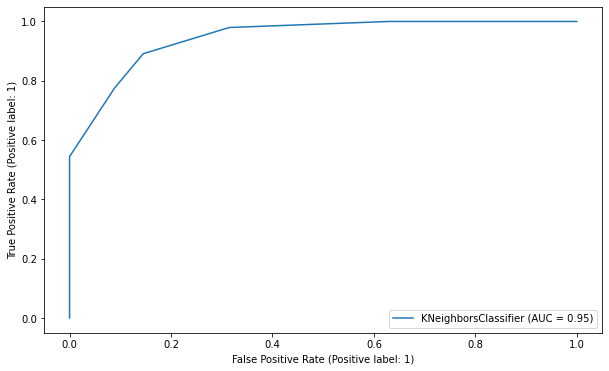

In [71]:
plot_roc_curve(knn_model, X_train_scaled, y_train);

In [72]:
y_pred_proba = knn_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.9462639894667544

In [73]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [74]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6

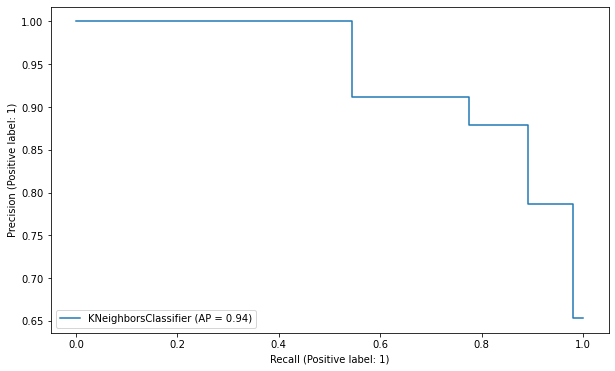

In [75]:
plot_precision_recall_curve(knn_model, X_train_scaled, y_train);

In [76]:
y_pred_proba = knn_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9397538566092076

In [77]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [78]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6

# Chose best model and make a random prediction 

In [79]:
scaler = StandardScaler().fit(X)

In [80]:
import pickle
pickle.dump(scaler, open("scaler_Heart_Stroke", 'wb'))

In [81]:
final_X_scaled = scaler.fit_transform(X)

In [100]:
final_knn_model = KNeighborsClassifier(n_neighbors = 12, p = 1, weights = 'distance').fit(final_X_scaled, y)

In [101]:
pickle.dump(final_knn_model, open("final_knn_model_Heart_Stroke", 'wb'))

In [102]:
values = [[25,0,2,180,200,0,0,200,1,1.8,1,1,0]]

In [103]:
sample = pd.DataFrame(values)
sample

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,25,0,2,180,200,0,0,200,1,1.8,1,1,0


In [104]:
scaler_Heart_Stroke = pickle.load(open("scaler_Heart_Stroke", "rb"))

In [105]:
sample_scaled = scaler_Heart_Stroke.transform(sample)
sample_scaled

array([[-3.25701361, -1.46486632,  1.005911  ,  2.76015433, -0.89998143,
        -0.41844626, -1.0025412 ,  2.20551905,  1.43195847,  0.65281201,
        -0.64583368,  0.28003436, -3.78191608]])

In [106]:
final_knn_model=pickle.load(open("final_knn_model_Heart_Stroke", 'rb')) 

In [108]:
predictions = final_knn_model.predict(sample_scaled)
predictions_proba = final_knn_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [109]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.6"] = predictions2
sample

,0,1,2,3,4,5,6,7,8,9,10,11,12,pred_proba,pred_0.50,pred_0.6
0,25,0,2,180,200,0,0,200,1,1.8,1,1,0,0.838758,1,1


In [110]:
final_knn_model.predict(values)

array([1], dtype=int64)